In [1]:
import cudf 

In [2]:
movie = cudf.read_csv('../../Data/movie.csv',index_col='movie_title')
movie.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,None,Doug Walker,null,null,131.0,null,Rob Walker,131.0,null,Documentary,...,null,None,None,None,null,null,12.0,7.1,null,0


In [3]:
#找出时长大于两小时的电影
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [4]:
movie_2_hours.sum()



1039

In [5]:
movie_2_hours.mean()



0.2113506916192026

In [6]:
movie['duration'].dropna().gt(120).mean()



0.21199755152009794

In [7]:
# movie_2_hours.describe()



NotImplementedError: Describing non-numeric columns is not yet supported

In [7]:
#组合条件表达式
cri1=movie.imdb_score >8
cri2=movie.content_rating=='PG-13'
cri3=(movie.title_year<2000)|(movie.title_year>2009)
cri2.head()


Avatar                                        True
Pirates of the Caribbean: At World's End      True
Spectre                                       True
The Dark Knight Rises                         True
Star Wars: Episode VII - The Force Awakens    null
Name: content_rating, dtype: bool

In [8]:
cri_final = cri1&cri2&cri3
cri_final.head()



Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     null
dtype: bool

In [9]:
#以上代码结果可以直接作为过滤器使用
movie[cri_final].head()



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [10]:
cols = ['imdb_score','content_rating','title_year']
movie_filtered = movie.loc[cri_final,cols]
movie_filtered.head()



,imdb_score,content_rating,title_year
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0


In [11]:
#一个让代码变快的小技巧
college = cudf.read_csv('../../Data/college.csv')
college[college['STABBR']=='TX'].head()


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,null,null,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,null,null,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,null,null,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [12]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()



,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985


In [17]:
%timeit college[college['STABBR']=='TX']



89.2 ms ± 4.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit college2.loc['TX']

224 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
college2.index.is_monotonic



False

In [15]:
college3 = college2.sort_index()
college3.index.is_monotonic


True

In [16]:
%timeit college[college['STABBR']=='TX']



72.9 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit college2.loc['TX']



220 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit college3.loc['TX']

224 ms ± 9.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
college_unique = college.set_index('INSTNM')



In [21]:
#注意有什么不同
college[college['INSTNM'] == 'Stanford University']



,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [22]:
college_unique.loc['Stanford University']



,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [23]:
#玩一手股票
slb = cudf.read_csv('../../Data/slb_stock.csv',index_col='Date',parse_dates=['Date'])
slb.head()


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [24]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1,.9])
slb_summary



count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [34]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
cri = (slb_close < lower_10) | (slb_close > upper_10)
slb_t_b_10 = slb_close[cri]


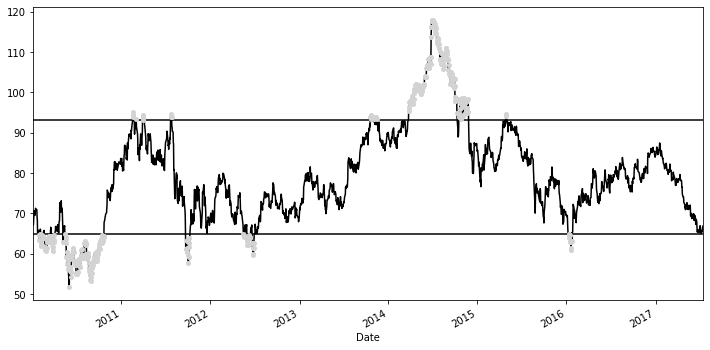

In [35]:
from matplotlib import pyplot as plt
pdslb_close = slb_close.to_pandas()
pdslb_close.plot(color='black',figsize=(12,6))
# slb_t_b_10.to_pandas.plot(marker='o',style=' ',ms=4,color='lightgray')
pdslb_t_b_10 = slb_t_b_10.to_pandas()
pdslb_t_b_10.plot(marker='o',style=' ',ms=4,color='lightgray')
xmin = cri.index[0]
xmax=cri.index[-1]
plt.hlines(y=[lower_10,upper_10],xmin=xmin,xmax=xmax,color='black')


In [ ]:
#现在我们来转换一条SQL语句
# SELECT
#     UNIQUE_ID,
#     DEPARTMENT,
#     GENDER,
#     BASE_SALARY,
# FROM
#     EMPLOYEE
# WHERE 
#     DEPARTMENT IN ('Houston Police Depart-HPD','Houston Fire Department (HFD)') AND
#     GENDER = 'Female' AND
#     BASE_SALARY BETWEEN 80000 AND 120000;




In [37]:
employee = cudf.read_csv('../../Data/employee.csv')
employee.DEPARTMENT.value_counts().head()


Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int32

In [38]:
employee.GENDER.value_counts()



Male      1397
Female     603
Name: GENDER, dtype: int32

In [39]:
employee.BASE_SALARY.describe().astype('int')



count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int64

In [ ]:
depts = ['Houston Police Department-HPD','Houston Fire Department (HFD)']
cri_dept = employee.DEPARTMENT.isin(depts)
cri_gender = employee.GENDER == 'Female'
cri_sal = (employee.BASE_SALARY >=80000) & (employee.BASE_SALARY <=120000)

In [44]:
cri_sal


0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: BASE_SALARY, Length: 2000, dtype: bool

In [46]:
cri_final = (cri_dept & cri_sal&cri_gender)
select_col = ['UNIQUE_ID',
    'DEPARTMENT',
    'GENDER',
    'BASE_SALARY']
employee.loc[cri_final,select_col].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0


In [3]:
#where 的用法
movie = cudf.read_csv('../../Data/movie.csv',index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()



Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [4]:
fb_likes.describe(percentiles=[.1,.25,.5,.75,.9]).astype(int)



count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int64

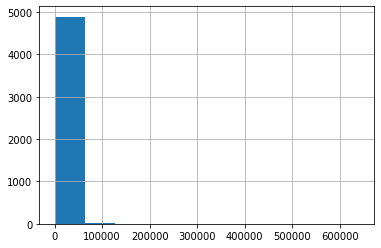

In [5]:
pdfb_likes = fb_likes.to_pandas()
pdfb_likes.hist()



In [7]:
cri_high = fb_likes < 20000
cri_high.mean()


0.9085353432470972

In [10]:
fb_likes.where(cri_high).head()



Avatar                                         1000.0
Pirates of the Caribbean: At World's End         null
Spectre                                       11000.0
The Dark Knight Rises                            null
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [13]:
#填充miss值
fb_likes.where(cri_high,other=2000).head()
#根我余项的不太一样这可能是个bug

Avatar                                        null
Pirates of the Caribbean: At World's End      null
Spectre                                       null
The Dark Knight Rises                         null
Star Wars: Episode VII - The Force Awakens    null
Name: actor_1_facebook_likes, dtype: float64

In [18]:
cri_low = fb_likes > 300
fb_likes_cap = fb_likes.where(cri_low).where(cri_high)
fb_likes_cap.head()


Avatar                                         1000.0
Pirates of the Caribbean: At World's End         null
Spectre                                       11000.0
The Dark Knight Rises                            null
Star Wars: Episode VII - The Force Awakens       null
Name: actor_1_facebook_likes, dtype: float64

In [19]:
len(fb_likes),len(fb_likes_cap)



(4909, 4909)

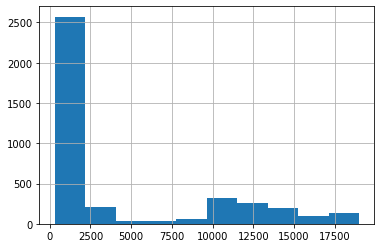

In [20]:
#这里我将cudf转化为dataframe
pdfb_cap = fb_likes_cap.to_pandas()
pdfb_cap.hist()



In [5]:
#
movie = cudf.read_csv('../../Data/movie.csv',index_col='movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1&c2


In [7]:
movie_loc = movie.loc[criteria]
movie_loc.head()



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,null,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,null,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [14]:
movie_1 = movie[criteria]


In [15]:
movie_loc.equals(movie_1)
#应该是True，以后的版本再看看吧


False